
**Problem Statement:**


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.<br>

**Description of fnlwgt (final weight):**<br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. <br>

**These are:**<br>

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [177]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
## Reading the dataset
data=pd.read_csv('census_income.csv')
## Saving a copy of the original dataset
data_copy=data

data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [179]:
data.shape

(32560, 15)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- **Dataset has 14 features and 32560 observations.**

- **Income is our target & has object data.**

- **Dataset doesnot have any missing values.**

- **Features with object data:**
 - Workclass
 - Education
 - Marital_status
 - Occupation
 - Relationship
 - Race 
 - Sex
 - Native_country
 
- **Features with numeric data:**
 - Age
 - Fnlwgt
 - Education_num
 - Capital_gain
 - Capital_loss
 - Hours_per_week

In [181]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**This further confirms that dataset has no missing values**

## EDA

**Checking the classes and their frequencies in target variable**

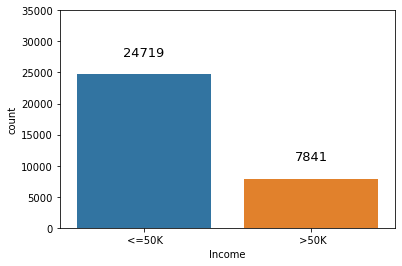

In [182]:
plt.ylim(0,35000)
ax=sns.countplot(data['Income'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+7000), ha='center', va='top', color='black', size=13)
plt.show()

Target has two classes:
- '<=50K' with 24719 observations (76%)
- '>50K' with 7841 observations (24%)

In [183]:
## Checking statistical summery of continuous features
data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- 'Age','Fnlwgt','Education_num','Hours_per_week' looks normally distributed
- 'Capital_gain', 'Capital_loss' needs more investigation

In [184]:
len(data['Capital_gain'].unique())

119

In [185]:
len(data['Capital_loss'].unique())

92

- 'Capital_gain' has only 119 non-zero values in 32560 observations.
- 'Capital_loss' has only 92 non-zero values in 32560 observations.

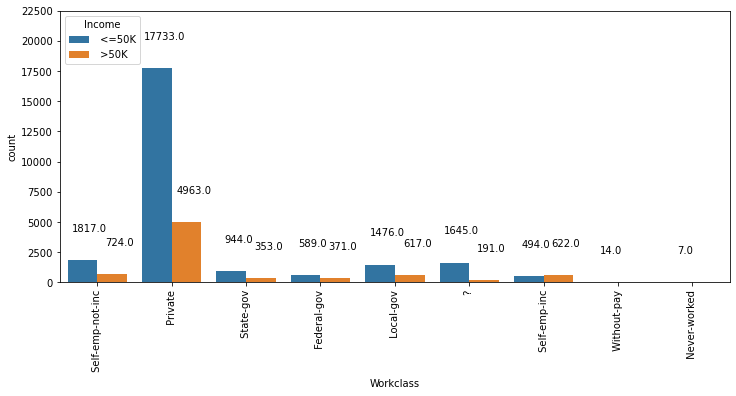

In [186]:
plt.figure(figsize=(12,5))
plt.ylim(0,22500)
plt.xticks(rotation=90)
ax=sns.countplot(data['Workclass'],hue=data['Income'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()+4000), ha='center', va='top', color='black', size=10)
plt.show()

- most of the people work in private sector.
- in all the workclasses the proportion of low earning individuals '<=50K' is way more than the prooprtion of high earning '>50K' except the 'self-emp-inc' class.
- for 1836 individuals the workclass in not known.

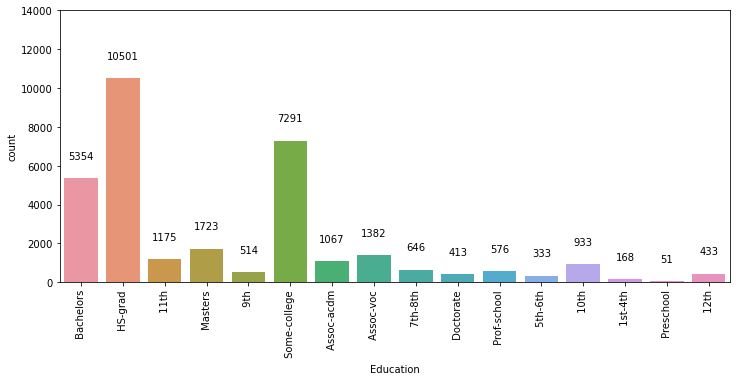

In [187]:
plt.figure(figsize=(12,5))
plt.ylim(0,14000)
plt.xticks(rotation=90)
ax=sns.countplot(data['Education'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+2000), ha='center', va='top', color='black', size=10)
plt.show()

- Majority of individuals have either Bachelors, HS-grad degrees or have attended some college.

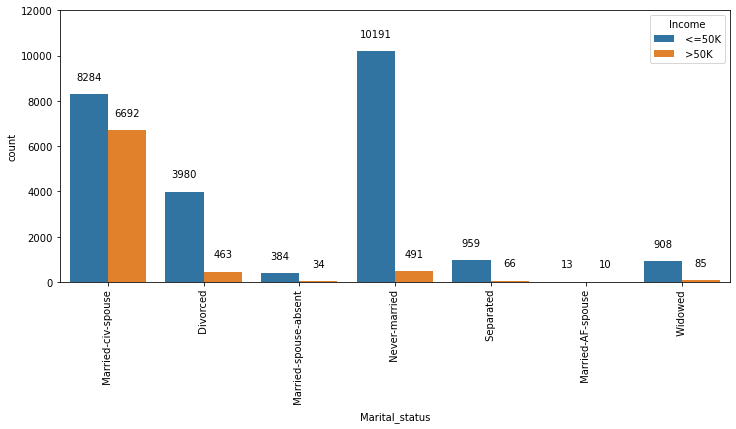

In [188]:
plt.figure(figsize=(12,5))
plt.ylim(0,12000)
plt.xticks(rotation=90)
ax=sns.countplot(data['Marital_status'],hue=data['Income'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+1500), ha='center', va='top', color='black', size=10)
plt.show()

- 'Married-civ-spouse' group has high propostion of 'high-earning' induviduals.
- Individuals who have never married tend to be 'low earning'

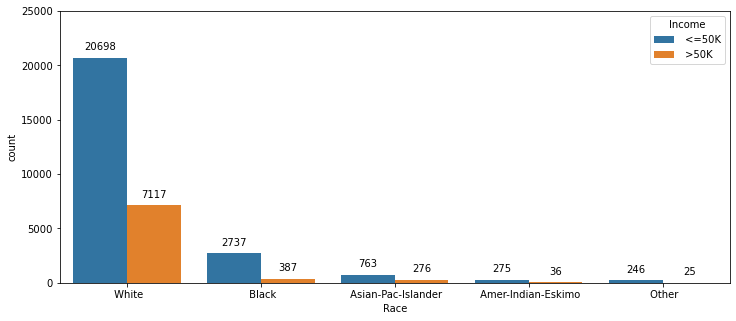

In [189]:
plt.figure(figsize=(12,5))
plt.ylim(0,25000)
ax=sns.countplot(data['Race'],hue=data['Income'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+2500), ha='center', va='top', color='black', size=10)
plt.show()

- White people form majority of the population.

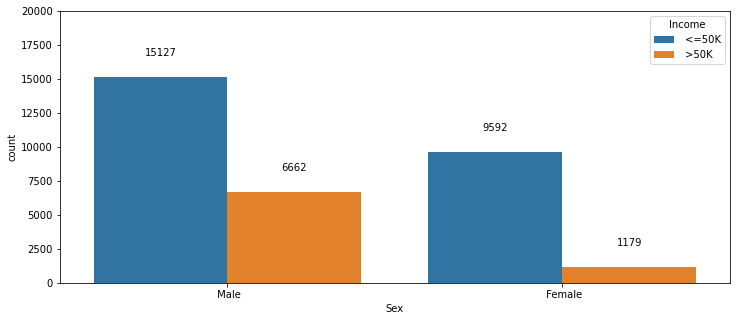

In [190]:
plt.figure(figsize=(12,5))
plt.ylim(0,20000)
ax=sns.countplot(data['Sex'],hue=data['Income'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+3000), ha='center', va='top', color='black', size=10)
plt.show()

- Males tend to be more 'High earning' than the Females

**Checking the Skewness in continuous features.**

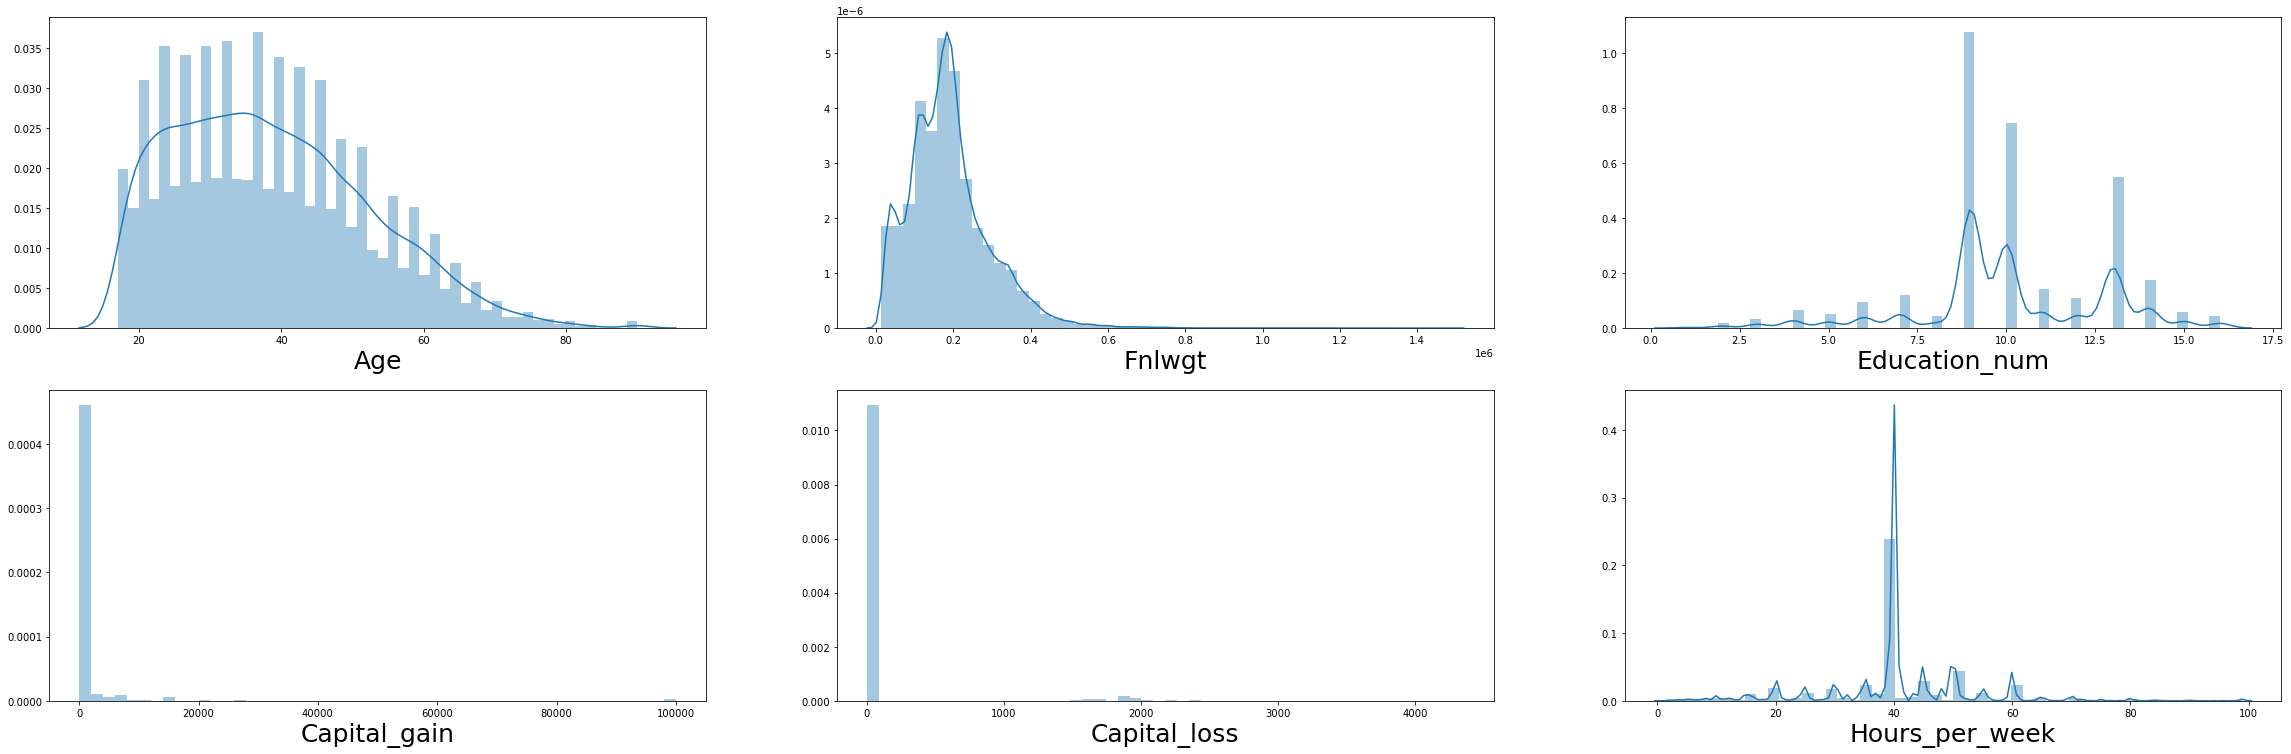

In [191]:
cont_feat=data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]

plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<10:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [192]:
cont_feat.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

- 'Capital_gain', 'Capital_loss' show very high skewness which is expected as they have very few non zero values.
- We will take a call on how to deal with this after checking their relationship with the target.

## Encoding Object type data in to numeric data

In [193]:
income=data['Income'].replace([' <=50K',' >50K'],[0,1])
data['Income']=income
data['Income'].head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [194]:
data['Income'].value_counts() 

0    24719
1     7841
Name: Income, dtype: int64

In [195]:
##Applying label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

a=['Workclass','Education','Occupation','Relationship','Race','Native_country','Marital_status']

for i in a:
    data[i]=le.fit_transform(data[i])

In [196]:
## Applying one hot encoding
data=pd.get_dummies(data,drop_first=True)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int64
 14  Sex_ Male       32560 non-null  uint8
dtypes: int32(7), int64(7), uint8(1)
memory usage: 2.6 MB


Now, All of our data is in numeric form

## Checking the relationship between features and the target

**Continuous Features:**

In [198]:
cont_feat=data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

In [201]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [202]:
selectbest=SelectKBest(score_func=f_classif,k=5)
selectbest.fit(cont_feat,data['Income'])

SelectKBest(k=5)

In [203]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cont_feat.columns)

In [204]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(9,'Scores')

,Features,Scores
0,Age,1886.677918
4,Hours_per_week,1813.339094
2,Capital_gain,1709.157677
3,Capital_loss,754.777449
1,Fnlwgt,2.926983


- Fnlwgt shows very weak relationship with the target hence we will drop it.
- Other continuous show strong relationship with the target but we will keep them.
- Even though the 'Capital_gain','Capital_loss' has very few non-zero values, they show strong relationship with the target. As we cannot dropp these two variables which have very strong skewness, we will not use linear models for this dataset.


In [205]:
data.drop('Fnlwgt',axis=1,inplace=True)

**Catagorical Features:**

In [206]:
cat_features=data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex_ Male','Native_country','Education_num']]

In [207]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [208]:
selectbest=SelectKBest(score_func=chi2,k=9)
selectbest.fit(cat_features,data['Income'])

SelectKBest(k=9, score_func=<function chi2 at 0x0000028FA27BEDC0>)

In [209]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cat_features.columns)

In [210]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(9,'Scores')

,Features,Scores
4,Relationship,3659.284242
8,Education_num,2401.747817
2,Marital_status,1123.319381
3,Occupation,504.245887
6,Sex_ Male,502.508527
1,Education,297.900431
0,Workclass,47.578283
5,Race,33.037981
7,Native_country,13.628089


- 'Relationship', 'Education_num', 'Marital_status' show strong relationship with the target.
- 'Occupation', 'Sex_ Male','Education' show moderate relationship with the target.
- 'Workclass', 'Race', 'Native_country' show weak relationship with the target.

### Seperating features and label

In [211]:
X=data.drop(['Income','Workclass', 'Race', 'Native_country'],axis=1)
y=data['Income']

## Balancing the dataset using SMOTE

In [212]:
from imblearn.over_sampling import SMOTE

In [213]:
smote=SMOTE(sampling_strategy='minority')

In [214]:
X_sm,y_sm=smote.fit_sample(X,y)

In [215]:
print(y_sm.value_counts())

1    24719
0    24719
Name: Income, dtype: int64


### Scaling the features

In [216]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [217]:
X_scaled=scaler.fit_transform(X_sm)

### Splitting the data into training and testing sets

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.25,random_state=42)

In [220]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve,roc_curve
from sklearn.model_selection import cross_val_score

## Model 1: SVC

In [221]:
from sklearn.svm import SVC
svc=SVC()

In [222]:
svc.fit(X_train,y_train)

SVC()

In [223]:
y_svc=svc.predict(X_test)

In [224]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.841747572815534

In [225]:
svc_cvs=cross_val_score(svc,X_scaled,y_sm,cv=5).mean()
svc_cvs

0.836644393131054

In [226]:
print(confusion_matrix(y_test,y_svc))

[[4772 1393]
 [ 563 5632]]


In [227]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      6165
           1       0.80      0.91      0.85      6195

    accuracy                           0.84     12360
   macro avg       0.85      0.84      0.84     12360
weighted avg       0.85      0.84      0.84     12360



## Model 2: KNN 

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [229]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [230]:
y_knn=knn.predict(X_test)

In [231]:
knn_score=accuracy_score(y_test,y_knn)
knn_score

0.8541262135922331

In [232]:
knn_cvs=cross_val_score(knn,X_scaled,y_sm,cv=5).mean()
knn_cvs

0.8441690925418394

In [233]:
print(confusion_matrix(y_test,y_knn))

[[5032 1133]
 [ 670 5525]]


In [234]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6165
           1       0.83      0.89      0.86      6195

    accuracy                           0.85     12360
   macro avg       0.86      0.85      0.85     12360
weighted avg       0.86      0.85      0.85     12360



## Model 3: Decision tree classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [236]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [237]:
y_dt=dt.predict(X_test)

In [238]:
dt_score=accuracy_score(y_test,y_dt)
dt_score

0.8532362459546926

In [239]:
dt_cvs=cross_val_score(dt,X_scaled,y_sm,cv=5).mean()
dt_cvs

0.8564673079258404

In [240]:
print(confusion_matrix(y_test,y_dt))

[[5129 1036]
 [ 778 5417]]


In [241]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6165
           1       0.84      0.87      0.86      6195

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360



## Model 4: Random Forest Classifier

In [242]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [243]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [244]:
y_rf=rf.predict(X_test)

In [245]:
rf_score=accuracy_score(y_test,y_rf)
rf_score

0.8805016181229773

In [246]:
rf_cvs=cross_val_score(rf,X_scaled,y_sm,cv=5).mean()
rf_cvs

0.8801131794128016

In [247]:
print(confusion_matrix(y_test,y_rf))

[[5279  886]
 [ 591 5604]]


In [248]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6165
           1       0.86      0.90      0.88      6195

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360



## Gradient Boosting Classifier

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [250]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [251]:
y_gbc=gbc.predict(X_test)

In [252]:
gbc_score=accuracy_score(y_test,y_gbc)
gbc_score

0.8563106796116505

In [253]:
gbc_cvs=cross_val_score(gbc,X_scaled,y_sm,cv=5).mean()
gbc_cvs

0.8486392165941155

In [254]:
print(confusion_matrix(y_test,y_gbc))

[[5072 1093]
 [ 683 5512]]


In [255]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6165
           1       0.83      0.89      0.86      6195

    accuracy                           0.86     12360
   macro avg       0.86      0.86      0.86     12360
weighted avg       0.86      0.86      0.86     12360



### Plotting the ROC_AUC curve

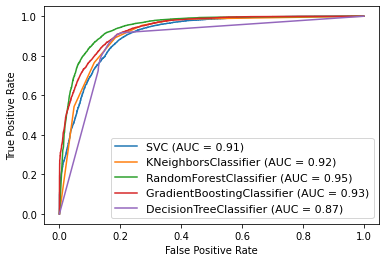

In [256]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

**Based on the AUC and accuracy scores, Random Forest Classifier is our best model**

### Tuning the hyperparameters of best model

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
rf_grid={'criterion':['gini','entropy'],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,5],
         'n_estimators':[80,100,120]}

In [163]:
gridCV=GridSearchCV(rf,param_grid=rf_grid,n_jobs=-1)

In [164]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [80, 100, 120]})

In [165]:
gridCV.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 80}

In [166]:
rf_best=RandomForestClassifier(criterion='gini',min_samples_split=4,min_samples_leaf=2,n_estimators=80)

In [167]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, n_estimators=80)

In [168]:
y_best=rf_best.predict(X_test)

In [169]:
best_score=accuracy_score(y_test,y_best)
best_score

0.8798543689320388

In [170]:
best_cvs=cross_val_score(rf_best,X_scaled,y_sm,cv=5).mean()
best_cvs

0.8767350797015989

In [171]:
print(confusion_matrix(y_test,y_best))

[[5219  946]
 [ 539 5656]]


In [172]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      6165
           1       0.86      0.91      0.88      6195

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360



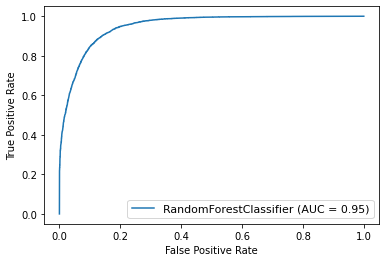

In [173]:
## Plotting roc_auc curve for the best model
disp=plot_roc_curve(rf_best,X_test,y_test)
plt.legend(prop={'size':11},loc='lower right')

### Saving the best model

In [176]:
import pickle
filename='CensusIncomeProject_rfc.pkl'
pickle.dump(rf_best,open(filename,'wb'))